In [24]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [25]:
df=pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [26]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [27]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [28]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [29]:
X=df.iloc[:,1:3]
Y=df.iloc[:,0]

In [30]:
X_train,X_test,Y_train,Y_test=tts(X,Y,test_size=0.2,random_state=42)

C:\Users\spree\AppData\Local\Temp\ipykernel_11564\2169456623.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])
C:\Users\spree\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


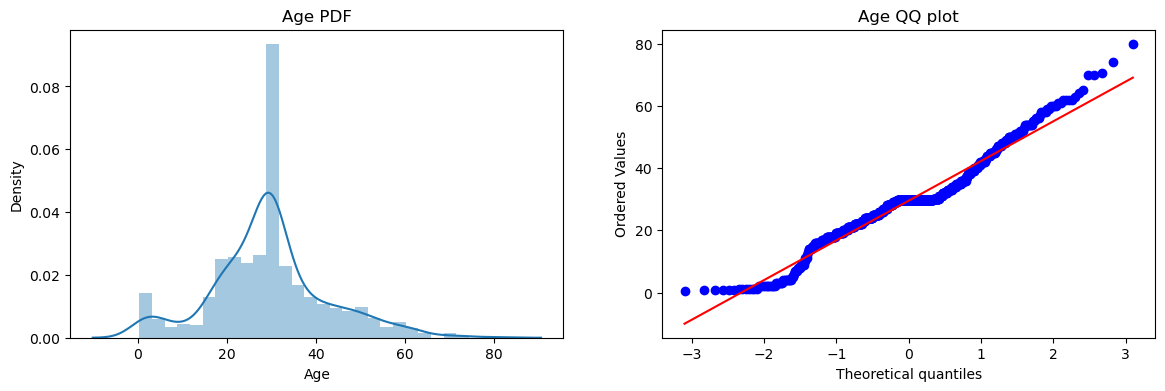

In [31]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'],dist='norm',plot=plt)
plt.title('Age QQ plot')

plt.show()

C:\Users\spree\AppData\Local\Temp\ipykernel_11564\1718647608.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])
C:\Users\spree\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


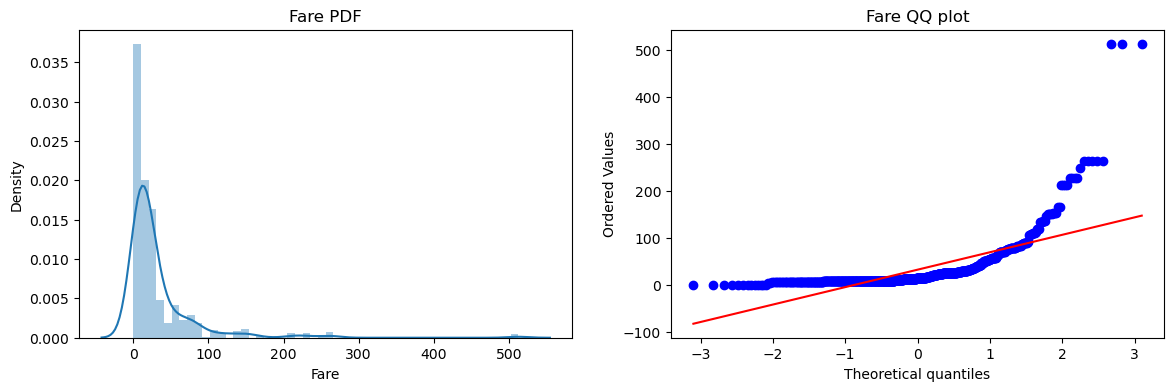

In [32]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'],dist='norm',plot=plt)
plt.title('Fare QQ plot')

plt.show()

In [33]:
clf=LogisticRegression()

In [34]:
clf2=DecisionTreeClassifier()

In [35]:
clf.fit(X_train,Y_train)
clf2.fit(X_train,Y_train)

Y_pred=clf.predict(X_test)
Y_pred2=clf2.predict(X_test)
print("Accuracy-> Logistic:",accuracy_score(Y_test,Y_pred))
print("Accuracy-> DecisionTree:",accuracy_score(Y_test,Y_pred2))

Accuracy-> Logistic: 0.6480446927374302
Accuracy-> DecisionTree: 0.664804469273743


In [36]:
trf=FunctionTransformer(func=np.log1p)#log(x+1) -> log(0) does not occur

In [37]:
X_train_transformed=trf.fit_transform(X_train)
X_test_transformed=trf.fit_transform(X_test)

In [38]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()

clf.fit(X_train_transformed,Y_train)
clf2.fit(X_train_transformed,Y_train)

Y_pred=clf.predict(X_test_transformed)
Y_pred2=clf2.predict(X_test_transformed)
print("Accuracy-> Logistic:",accuracy_score(Y_test,Y_pred))
print("Accuracy-> DecisionTree:",accuracy_score(Y_test,Y_pred2)) # No effect DecisionTree

Accuracy-> Logistic: 0.6815642458100558
Accuracy-> DecisionTree: 0.6983240223463687


In [39]:
#checking whether the improvement in logistic is prominent or not 
#using cross validation
X_transformed= trf.fit_transform(X)

clf=LogisticRegression()
clf2=DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed,Y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed,Y,scoring='accuracy',cv=10)))


LR 0.678027465667915
DT 0.6588264669163546


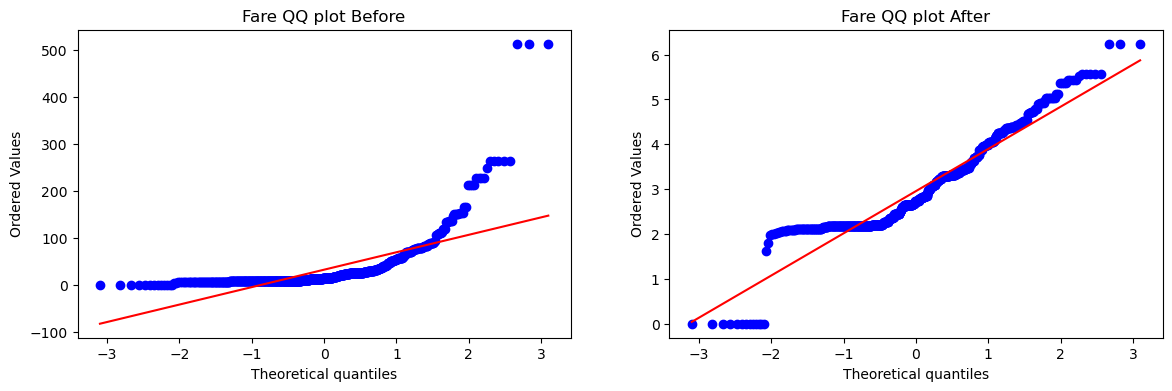

In [40]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(X_train['Fare'],dist='norm',plot=plt)
plt.title('Fare QQ plot Before')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'],dist='norm',plot=plt)
plt.title('Fare QQ plot After')

plt.show()

In [43]:
#No need to apply FunctionTransformer on age .
#Because data for age is not getting normalized.
trf2= ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')
X_train_transformed2=trf2.fit_transform(X_train)
X_test_transformed2=trf2.fit_transform(X_test)

In [44]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()

clf.fit(X_train_transformed2,Y_train)
clf2.fit(X_train_transformed2,Y_train)

Y_pred=clf.predict(X_test_transformed2)
Y_pred2=clf2.predict(X_test_transformed2)
print("Accuracy-> Logistic:",accuracy_score(Y_test,Y_pred))
print("Accuracy-> DecisionTree:",accuracy_score(Y_test,Y_pred2)) # No effect DecisionTree

Accuracy-> Logistic: 0.6703910614525139
Accuracy-> DecisionTree: 0.664804469273743


In [45]:
#checking whether the improvement in logistic is prominent or not 
#using cross validation
X_transformed= trf.fit_transform(X)

clf=LogisticRegression()
clf2=DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed,Y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed,Y,scoring='accuracy',cv=10)))


LR 0.678027465667915
DT 0.6577528089887641


In [69]:

def apply_transform(transform):
    X = df.iloc[:, 1:3]
    Y = df.iloc[:, 0]
    
    trf = ColumnTransformer([('log', FunctionTransformer(transform), ['Fare'])], remainder='passthrough')
    X_trans = trf.fit_transform(X)
    clf = LogisticRegression()
    print("Accuracy:", np.mean(cross_val_score(clf, X_trans, Y, scoring='accuracy', cv=10)))
    
    plt.figure(figsize=(15,5))
    
    plt.subplot(121)
    stats.probplot(X['Fare'], dist='norm', plot=plt)
    plt.title("Fare Before")
    
    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist='norm', plot=plt)  # Accessing transformed data correctly
    plt.title("Fare After")
    
    plt.show()



Accuracy: 0.6712609238451936


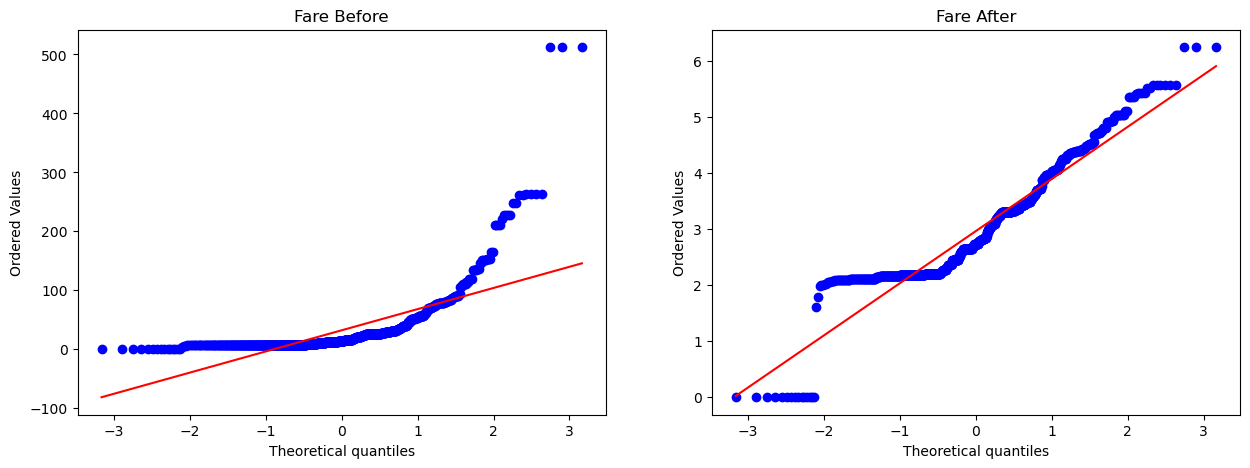

In [76]:
apply_transform(np.log1p)

In [ ]:
## Reciprocal not working..